In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from steinberg_utils_3vertex import *
from general_graph_utils import *

In [3]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(14,12)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

### Test for separation

1. Are autocorrelation functions $\mathcal{A}^{\alpha,\beta}(\tau)$ always monotonic decreasing? 
2. Does one of the curves $\mathcal{A}^{\alpha,\beta}(\tau)$ or $\mathcal{A}^{\beta,\alpha}(\tau)$ always lie above the other, or do the two curves cross for positive values of $\tau$? 
3. Does this separation of the two curves always occur for all sets of parameter values? 

Initialize a system.

In [4]:
params = random_parameters()

In [5]:
L = Laplacian_K(params)

In [6]:
pi = steady_state_MTT_K(params)

In [7]:
signal = [3, 5, 7]
alpha = 1
beta = 3
tau = np.around(np.arange(0.01,40.01,step=.01), decimals = 2)

In [8]:
a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha,beta)

In [26]:
index_a13 = np.array([])
index_a31 = np.array([])

In [27]:
for i in range(len(tau)):
    if np.round(a_13[i],10) > np.round(a_31[i],10):
        index_a13 = np.append(index_a13, i)
    elif np.round(a_13[i],10) < np.round(a_31[i],10):
        index_a31 = np.append(index_a31, i)
    elif np.round(a_13[i],10) == np.round(a_31[i],10):
        continue

In [28]:
index_a13

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 2.427e+03, 2.480e+03,
       2.487e+03])

In [29]:
index_a31

array([], dtype=float64)

The discrepancy for these specific points most likely comes from numerical precision error in the calculation of a_13 and a_31. We could try to round the values in the array, but how do we decide the cut-off?

In [32]:
def test_separation(a_13,a_31,tau):
    index_a13 = np.array([])
    index_a31 = np.array([])
    
    for i in range(len(tau)):
        if np.round(a_13[i],10) > np.round(a_31[i],10):
            index_a13 = np.append(index_a13, i)
        elif np.round(a_13[i],10) < np.round(a_31[i],10):
            index_a31 = np.append(index_a31, i)
        elif np.round(a_13[i],10) == np.round(a_31[i],10):
            continue
    
    return index_a13, index_a31

Are both steady state functions equivalent?

In [3]:
params = random_parameters()

In [4]:
L = Laplacian_K(params)

In [5]:
pi = steady_state_MTT_K(params)
print(pi)
print(pi.ndim)
print(np.diag(pi))

[0.03706932 0.14074326 0.82218742]
1
[[0.03706932 0.         0.        ]
 [0.         0.14074326 0.        ]
 [0.         0.         0.82218742]]


In [6]:
pi_all = steady_state_spectrum(L)
print(pi_all)
print(pi_all.ndim)
print(np.diag(pi_all))

[0.03706932 0.14074326 0.82218742]
1
[[0.03706932 0.         0.        ]
 [0.         0.14074326 0.        ]
 [0.         0.         0.82218742]]


In [7]:
def steady_state_spectrum(L):
    """
    Calculates the steady-state distribution for the any linear framework graph by computing the eigenvector associated with eigenvalue 0.
    
    Parameters
    ----------
    L : num_nodes x num_nodes array
        the Laplacian matrix of the graph G
    
    Returns
    -------
    pi : 1D array
         the steady state distribution for a 3-vertex graph K.
    
    """
    
    eigvals, eigvecs = scipy.linalg.eig(L)
    pi = [eigvecs[:,np.argmin(np.abs(eigvals))].real/sum(eigvecs[:,np.argmin(np.abs(eigvals))].real)]
    
    return pi

In [8]:
pi

array([0.03706932, 0.14074326, 0.82218742], dtype=float128)

In [9]:
pi_all

array([0.03706932, 0.14074326, 0.82218742], dtype=float128)

In [10]:
pi.ndim

1

In [11]:
pi_all.ndim

1

What is the largest possible area difference we can get?

In [12]:
# choosing a tau range large enough such that the entire decay is captured for as many sets of autocorrelation functions as possible
tau = np.around(np.arange(0.01,40.0,step=.01), decimals = 2)
signal = [3, 5, 7]
alpha = 1
beta = 3

true_params = np.array([])

new_area = 0
crowned_area = 0

for i in tqdm(range(100)):
    # randomly sample new parameters on K
    params = random_parameters()
    
    # calculate the autocorrelation functions
    L = Laplacian_K(params)
    pi = steady_state_MTT_K(params)
    a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha,beta)
    
    new_area = numerical_area(a_13,a_31)
    
    if new_area > crowned_area:
        true_params = params
        crowned_area = new_area

100%|█████████████████████████████████████████| 100/100 [03:27<00:00,  2.07s/it]


In [19]:
crowned_area

3269.2927552356802607

In [20]:
true_params

array([0.32161742, 0.3968768 , 0.00260506, 0.01338035, 0.02071359,
       0.00607068], dtype=float128)

1. Are autocorrelation functions $\mathcal{A}^{\alpha,\beta}(\tau)$ always monotonic decreasing? 
2. Does one of the curves $\mathcal{A}^{\alpha,\beta}(\tau)$ or $\mathcal{A}^{\beta,\alpha}(\tau)$ always lie above the other, or do the two curves cross for positive values of $\tau$? 
3. Does this separation of the two curves always occur for all sets of parameter values? 

In [31]:
params = random_parameters()
print(params)

[1.03928414e+01 5.82841470e-02 5.16352292e+01 2.79212497e+01
 1.13780955e-01 5.92138344e+02]


In [32]:
L = Laplacian_K(params)
L

array([[-1.05066224e+01,  5.82841470e-02,  5.92138344e+02],
       [ 1.03928414e+01, -5.16935133e+01,  2.79212497e+01],
       [ 1.13780955e-01,  5.16352292e+01, -6.20059594e+02]],
      dtype=float128)

In [33]:
pi = steady_state_MTT(params)
pi

array([0.81410504, 0.17146674, 0.01442822], dtype=float128)

In [34]:
# double check SS function works
pi_2 = steady_state_spectrum(L)
pi_2

array([[0.81410504],
       [0.17146674],
       [0.01442822]])

In [35]:
signal = [3, 5, 7]
alpha = 1
beta = 3

In [36]:
tau = np.around(np.arange(0.01,40.01,step=.01), decimals = 2)

In [37]:
a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha,beta)

In [38]:
sum(a_13.round(5) >= a_31.round(5))

4000

In [39]:
sum(a_31.round(5) > a_13.round(5))

0

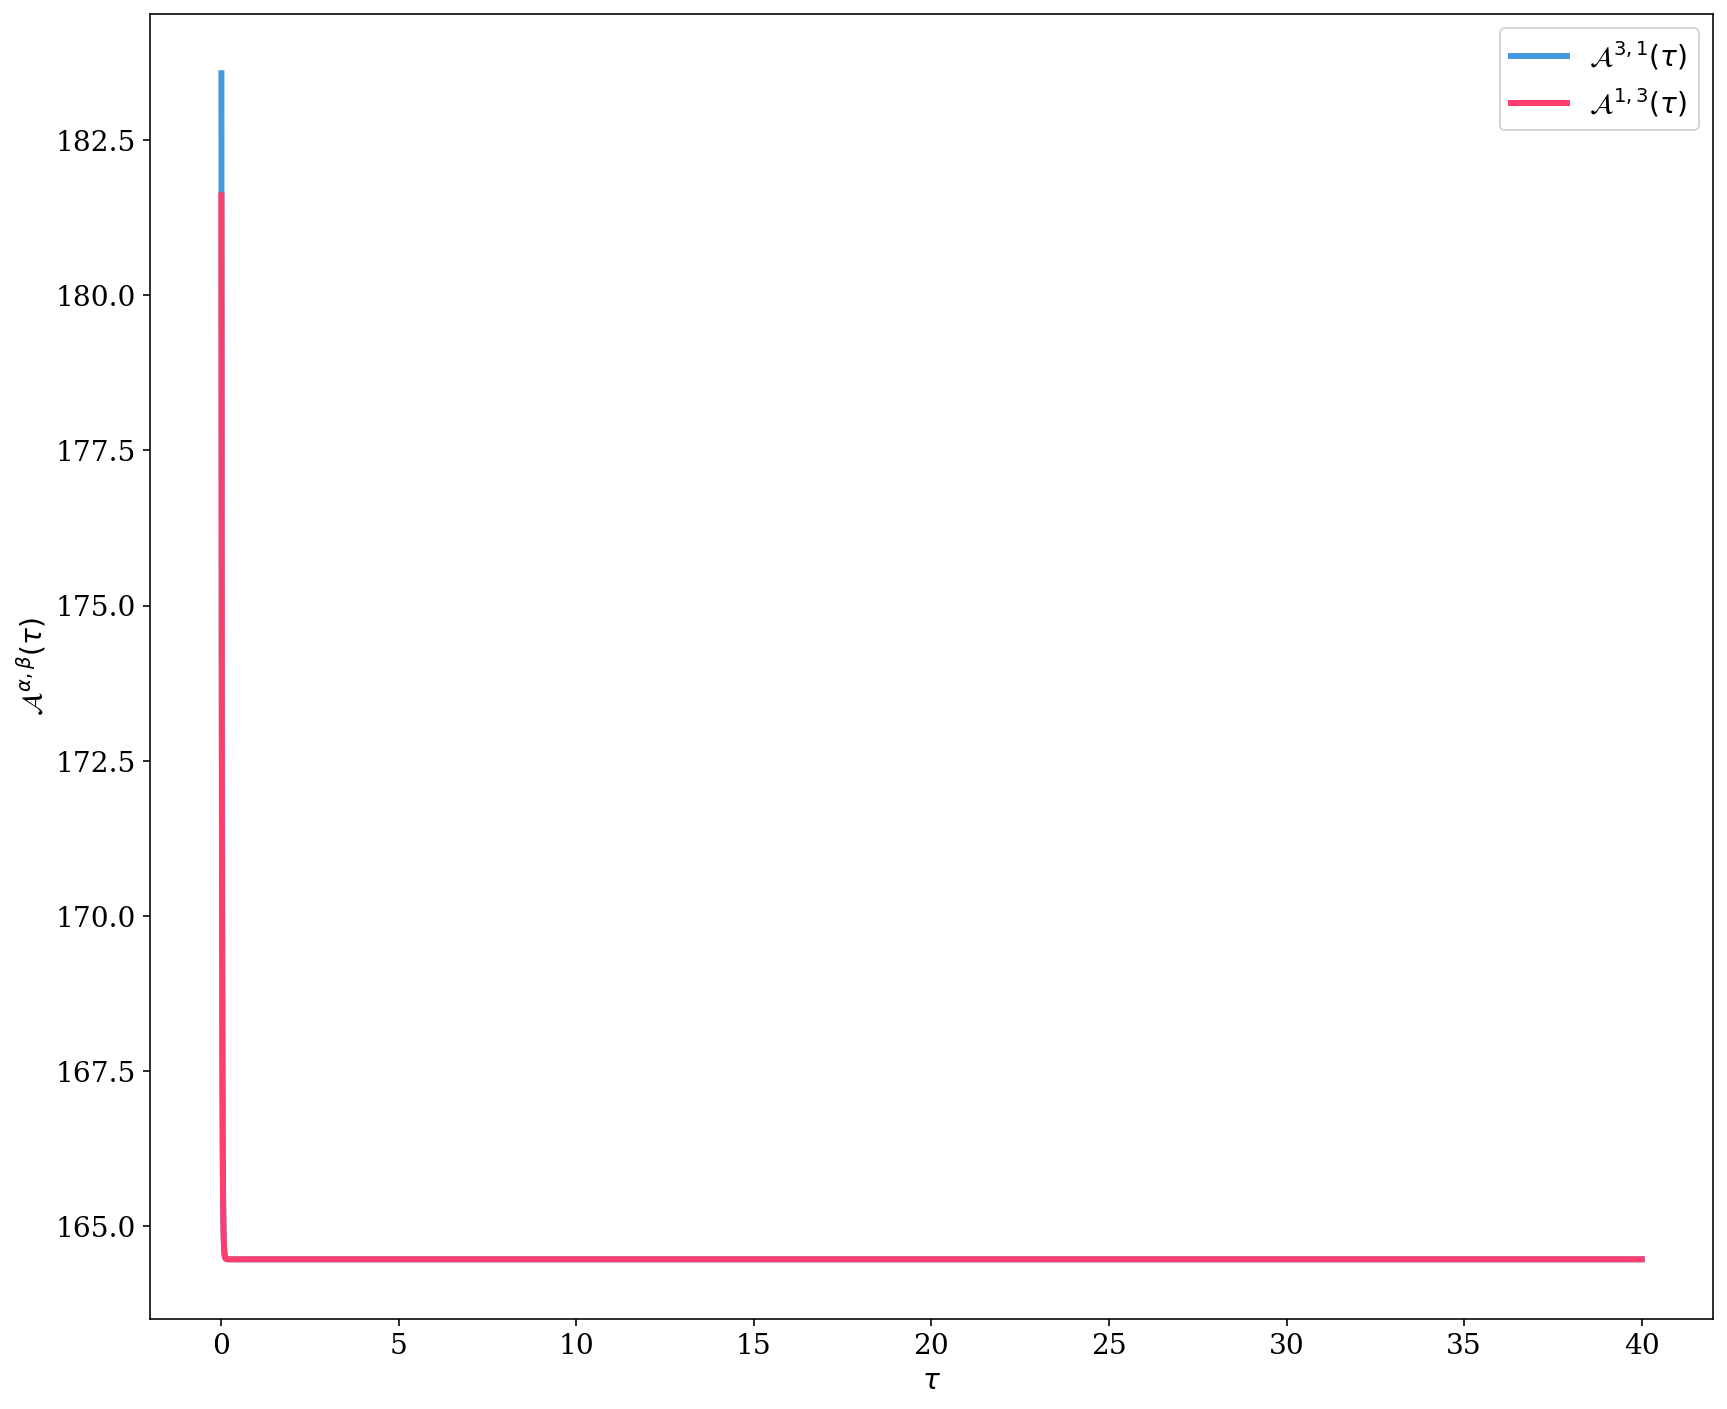

In [40]:
fig = plt.figure()
plt.plot(tau,a_13,label=r'$\mathcal{A}^{3,1}(\tau)$',linewidth=3, c= '#4599DF')
plt.plot(tau,a_31,label=r'$\mathcal{A}^{1,3}(\tau)$',linewidth=3,color='#FF3D6E')
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\mathcal{A}^{\alpha,\beta}(\tau)$")
plt.legend()
plt.show()

In [55]:
# choosing a tau range large enough such that the entire decay is captured for as many sets of autocorrelation functions as possible
tau = np.around(np.arange(0.01,40.0,step=.01), decimals = 2)
signal = [3, 5, 7]
alpha = 1
beta = 3

count = 0
issues = 0
a13_over = 0
a31_over = 0

# over 100 non-equilibrium parameter sets on K
for i in tqdm(range(10000)):
    
    # randomly sample new parameters on K
    params = random_parameters()
    
    # calculate the autocorrelation functions
    L = Laplacian_K(params)
    pi = steady_state_MTT(params)
    a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha,beta)
    
    # for how many values is one autocorrelation function strictly greater than the other
    # rounding to 5 decimal points
    a_13_sum = sum(a_13.round(10) > a_31.round(10))
    a_31_sum = sum(a_31.round(10) > a_13.round(10))
    
    # if either a_31 or a_13 is always less than the other autocorrelation function
    if (a_31_sum == 0) or (a_13_sum == 0):
        count += 1
        
        # which autocorrelation function lies on top of the other
        if a_31_sum == 0:
            a13_over += 1
        if a_13_sum == 0:
            a31_over += 1
    
    else: 
        issues += 1

100%|███████████████████████████████████████████| 100/100 [03:31<00:00,  2.11s/it]


In [56]:
count

82

In [57]:
a13_over

43

In [58]:
a31_over

39

In [59]:
issues

18

What I should do: ask if the issues are really instances where one function crosses the other? If not, then they can be included in count.